In [38]:
import pandas as pd
import os 

import sklearn.tree
import numpy as np

import StringIO
import pydot
import IPython.display
import sklearn.grid_search

In [16]:
phonecase = pd.read_csv("../../SYD_DAT_5/data/phonecase.csv")

In [17]:
set(phonecase.Colour)

{'Pink', 'Red', 'Yellow'}

In [18]:
# this is a neat bit of code to make one hot array
for colour in set(phonecase.Colour):
    phonecase[colour] = np.where(phonecase.Colour == colour, 1, 0)

In [20]:
# getting the data we want
X = phonecase[['Red','Pink','Yellow','Age']]
y = phonecase.Income

In [23]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth=2)

In [24]:
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [26]:
# how well the regressor did on its training set:
zip(regressor.predict(X),y)

[(7563.75, 0),
 (7563.75, 10),
 (7563.75, 0),
 (7563.75, 500),
 (7563.75, 10000),
 (7563.75, 30000),
 (7563.75, 0),
 (7563.75, 20000),
 (35000.0, 30000),
 (35000.0, 40000),
 (125000.0, 100000),
 (61666.666666666664, 80000),
 (125000.0, 150000),
 (61666.666666666664, 60000),
 (61666.666666666664, 100000),
 (61666.666666666664, 40000),
 (61666.666666666664, 60000),
 (61666.666666666664, 30000)]

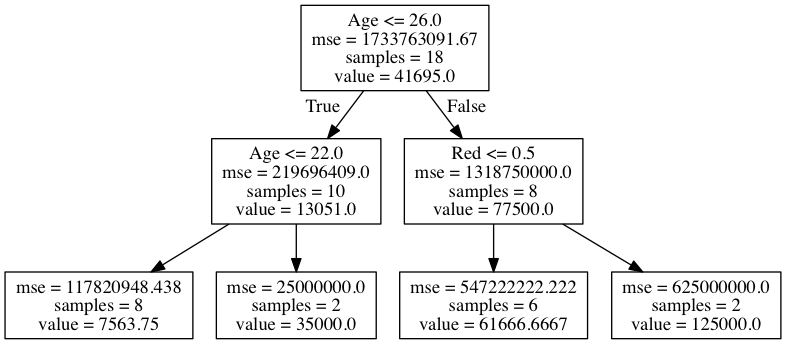

In [37]:
s = StringIO.StringIO()
sklearn.tree.export_graphviz(regressor, 
                             out_file=s, 
                             feature_names=['Red','Pink','Yellow','Age'])
graph = pydot.graph_from_dot_data(s.getvalue())
IPython.display.Image(graph.create_png())

In [71]:
dtr = sklearn.tree.DecisionTreeRegressor()
brute_force = sklearn.grid_search.GridSearchCV(dtr,
                                              {'max_depth': range(1,10)},
                                              cv = 6,
                                              scoring='mean_squared_error')

In [72]:
brute_force.fit(X,y)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [73]:
brute_force.best_score_

-1288938063.8888888

In [74]:
brute_force.best_params_

{'max_depth': 4}

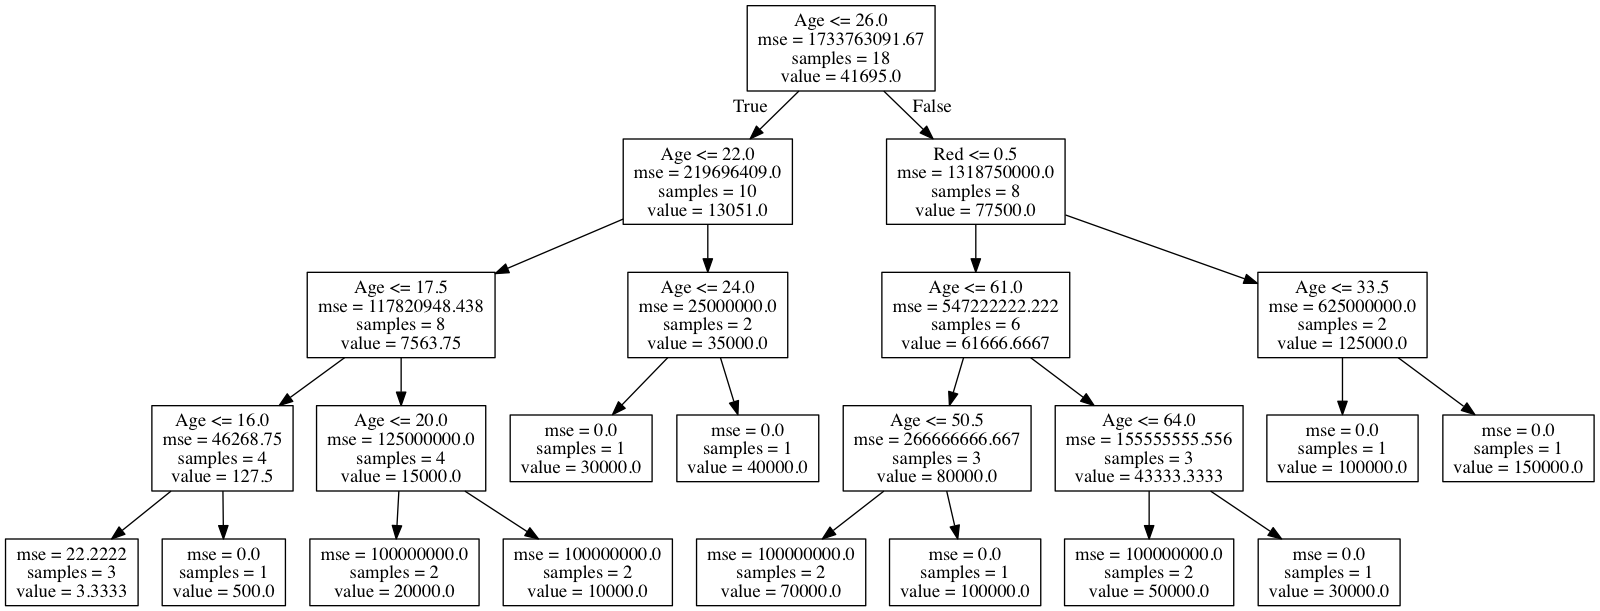

In [75]:
s = StringIO.StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, 
                             out_file=s, 
                             feature_names=['Red','Pink','Yellow','Age'])
graph = pydot.graph_from_dot_data(s.getvalue())
IPython.display.Image(graph.create_png())